# Hierarchical clustering

Useful links
* https://de.dariah.eu/tatom/working_with_text.html
* https://docs.obspy.org/tutorial/code_snippets/hierarchical_clustering.html

We'll need the matrix generated in the Affinity Propagation example

C:\UserData\takuyai\Miniconda3\envs\lith_nlp\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


41 Unique LithCodes that are not UNKN or numeric
['GRVL' 'CLAY' 'CRSE' 'SHLE' 'BSLT' 'ROCK' 'SAND' 'SOIL' 'GRNT' 'SASH'
 'CGLM' 'SDSN' 'TPSL' 'BLBN' 'COAL' 'SILT' 'LMSN' 'ALVM' 'QRTZ' 'SDCY'
 'LOAM' 'BLDR' 'SLTE' 'SLCY' 'BNST' 'VLCC' 'SLSN' 'BRBN' 'GRBN' 'MDSN'
 'WB' 'TUFF' 'BDRK' 'SNDY' 'SDMN' 'CVTY' 'CLBD' 'FILL' 'DLMT' 'WODY'
 'FINE']
Attempting to fill in 99 unknown MajorLithCode based on provided descriptions


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:33<00:00,  2.95it/s]


After clean up 40 unique LithCodes that are not UNKN or numeric
['GRVL' 'CLAY' 'CRSE' 'SHLE' 'BSLT' 'ROCK' 'SAND' 'SOIL' 'TPSL' 'GRNT'
 'SASH' 'CGLM' 'SDSN' 'COAL' 'SILT' 'LMSN' 'ALVM' 'QRTZ' 'SDCY' 'LOAM'
 'BLDR' 'SLTE' 'SLCY' 'VLCC' 'SLSN' 'BRBN' 'GRBN' 'MDSN' 'WB' 'TUFF'
 'BDRK' 'SNDY' 'SDMN' 'CVTY' 'CLBD' 'FILL' 'DLMT' 'WODY' 'BNST' 'FINE']
(1000,) (1000,)
Dictionary(139 unique tokens: ['bear', 'cement', 'gravel', 'water', 'clay']...)


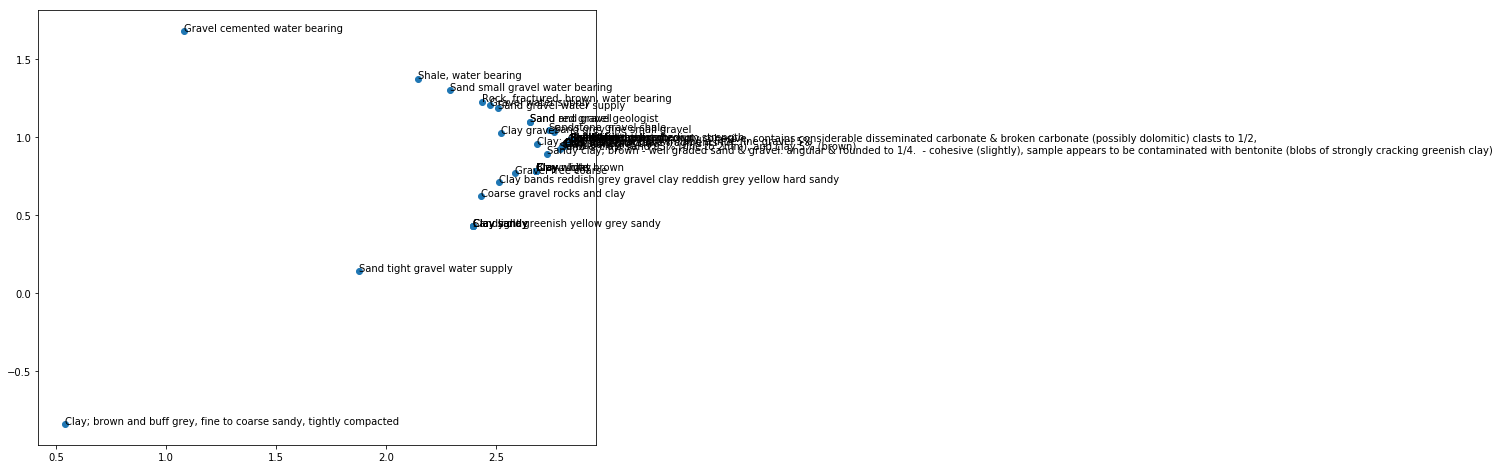

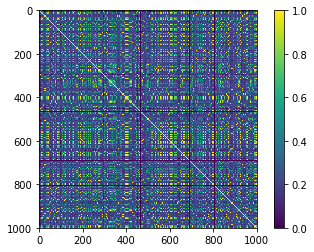

0.0
0.3101061049502639
0.22
1.0


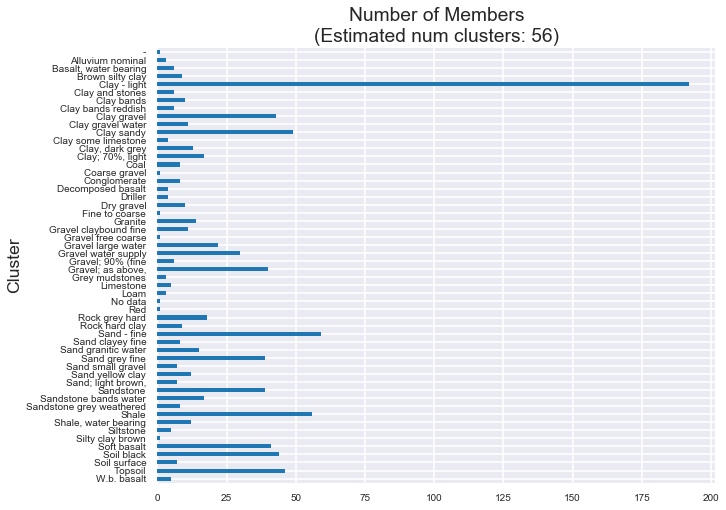

Jaccard: 1.0
Ratio: 1.0
Partial Ratio: 1.0
Token Set Ratio: 1.0
Token Sort Ratio: 1.0
noun tokens ['shale'] ['shale']
Score would be: 1.0


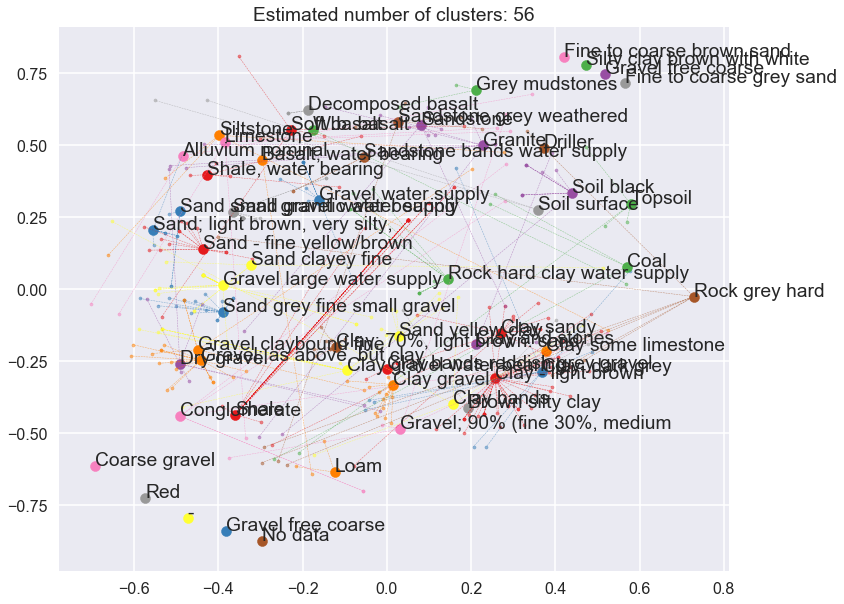

In [1]:
%run "Lith Affinity Prop.ipynb"

# The above runs notebook setup as well

In [2]:
import scipy
from scipy.cluster import hierarchy

In [3]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(1 - sim_matrix)  # shape (n_components, n_samples)

In [4]:
xs, ys = pos[:, 0], pos[:, 1]
names = lith_desc

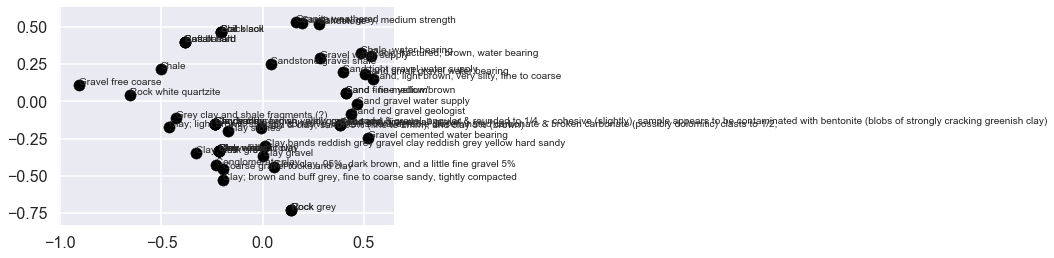

In [5]:
count = 0
for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y, c='k')
    plt.text(x, y, name)
    
    count += 1
    if count > 50:
        break

In [8]:
a = "Boulders claybound"
b = "Basalt, even drilling, dark"
print_sim_compare(a, b, stopw2)

Jaccard: 0.0
Ratio: 0.19
Partial Ratio: 0.5
Token Set Ratio: 0.19
Token Sort Ratio: 0.19
noun tokens ['boulder', 'claybound'] ['dark']
Score would be: 0.19


In [9]:
dissimilarity = 1 - sim_matrix
dissimilarity[np.isclose(dissimilarity , 0.0)] = 0

Text(0.5,1,'Dissimilarity\n(1.0 is not similar)')

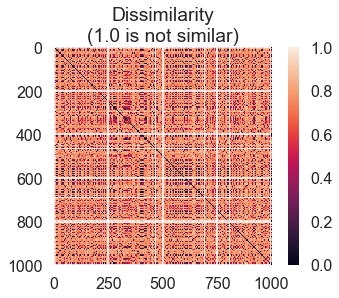

In [11]:
plt.imshow(dissimilarity)
plt.colorbar()
plt.title("Dissimilarity\n(1.0 is not similar)")

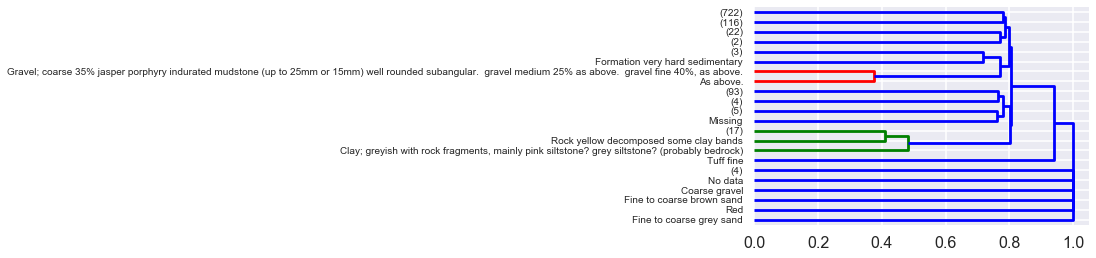

In [12]:
from scipy.spatial import distance
dis = distance.squareform(dissimilarity, checks=False)
threshold = 0.1
linkage = hierarchy.linkage(dis, method="average")
clusters = hierarchy.fcluster(linkage, threshold, criterion="distance")
dendro  = hierarchy.dendrogram(linkage, labels=lith_desc, orientation='right', count_sort=True,
                              truncate_mode='level', p=5) #truncate_mode='lastp', p=10)  # last two settings tell it to only show the last 'p'
plt.show()